<a href="https://colab.research.google.com/github/saqib-rgb/ML-With-Pytorch/blob/main/PyTorch_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch custom datasets

## 0. Importing PyTorch and setting up device-agnostic code

In [1]:
import torch
from torch import nn

# checking the version of PyTorch
torch.__version__

'2.0.0+cu118'

In [2]:
# set up device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 1. Downloading a custom datset

In [3]:
import requests
import zipfile
from pathlib import Path

# set up path to a data folder
data_path=Path('data/')
image_path=data_path/'pizza_steak_sushi'

if image_path.is_dir():
  print(f'{image_path}  directory already exists...skipping download')
else:
  print(f'{image_path} doesnot exist...craeting one...')
  image_path.mkdir(parents=True,exist_ok=True)

# download data
with open(data_path/'pizza_steak_sushi.zip','wb') as f:
  request=requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  print('Downloading data....')
  f.write(request.content)

# unzip 
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip','r') as zip_ref:
  print('Unzipping_file')
  zip_ref.extractall(image_path)


data/pizza_steak_sushi doesnot exist...craeting one...
Unzipping_file


## 2. exploring data(data preparation)

In [4]:
import os
def walk_through_dir(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and{len(filenames)} images in {dirpath}')
    

In [5]:
walk_through_dir(image_path)

There are 2 directories and0 images in data/pizza_steak_sushi
There are 3 directories and0 images in data/pizza_steak_sushi/train
There are 0 directories and78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and72 images in data/pizza_steak_sushi/train/sushi
There are 3 directories and0 images in data/pizza_steak_sushi/test
There are 0 directories and25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and31 images in data/pizza_steak_sushi/test/sushi


In [6]:
# setup train and testing path
train_dir=image_path/'train'
test_dir=image_path/'test'

train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing an image
1. get all the if
2. pich a random imagepath
3. get image class name using `pathlib.Path.parent.stem`
4. let us open image with pytorch
5. show imgage

data/pizza_steak_sushi/train/pizza/3196721.jpg
pizza
Random Image path:data/pizza_steak_sushi/train/pizza/3196721.jpg
image class:pizza
Image height:384
Image width:512


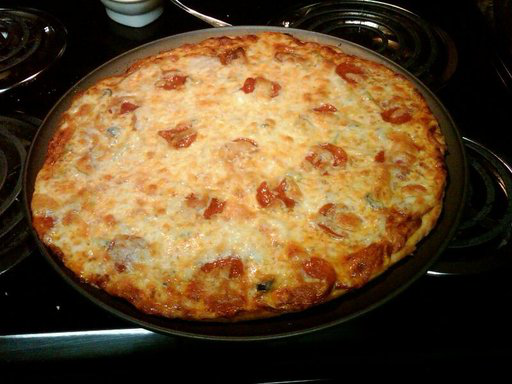

In [7]:
import random
from PIL import Image

# set random seed
random.seed(42)

# get all image path
image_path_list=list(image_path.glob('*/*/*.jpg'))

# random image path
random_image_path=random.choice(image_path_list)
print(random_image_path)

# get image class
image_class=random_image_path.parent.stem
print(image_class)

# open image
img=Image.open(random_image_path)

# print metadata
print(f'Random Image path:{random_image_path}')
print(f'image class:{image_class}')
print(f'Image height:{img.height}')
print(f'Image width:{img.width}')
img

(-0.5, 511.5, 383.5, -0.5)

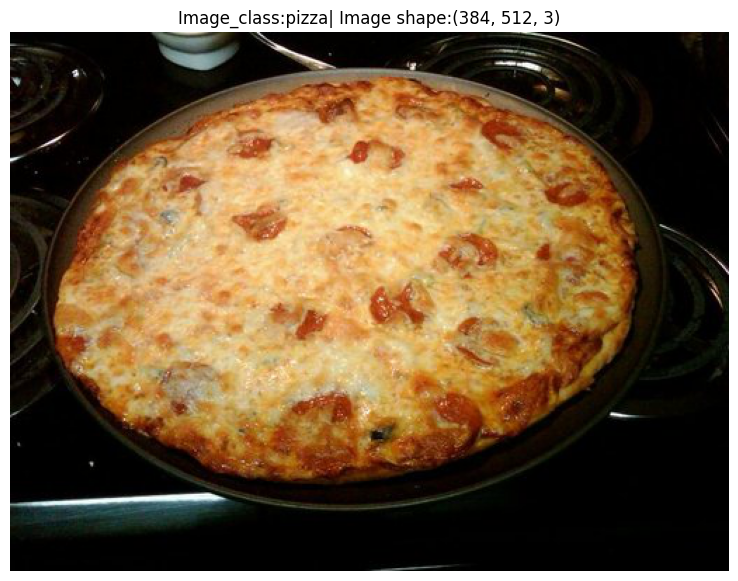

In [8]:
# printing the image using matplotlib
import numpy as np
import matplotlib.pyplot as plt

# turn image into array
image_as_array=np.asarray(img)

# plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(image_as_array)

plt.title(f'Image_class:{image_class}| Image shape:{image_as_array.shape}')
plt.axis(False)


## 3. Transforming data
1. Converting our data into Tensors
2. Turn it into `torch.utils.data.Dataset` and subsequently `torch.utils.data.DataLoader`

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [10]:
# write a transform image
data_transform=transforms.Compose([
    # Resize our images
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])


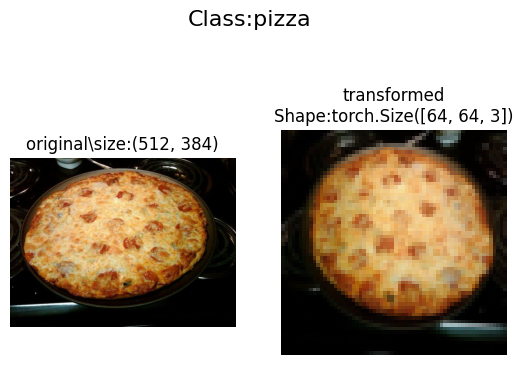

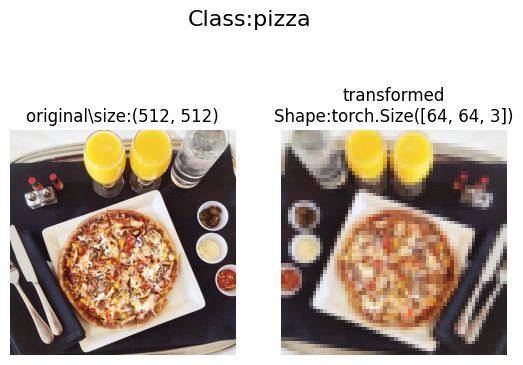

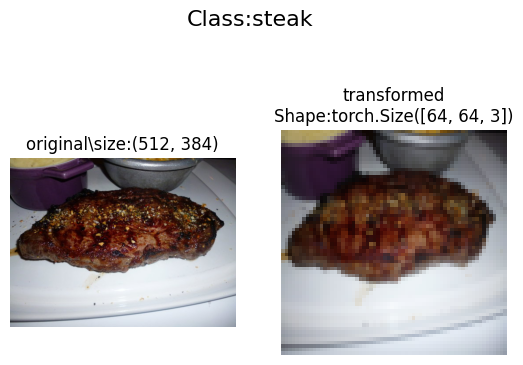

In [16]:
def plot_transformed_images(image_paths:list,transform,n=3,seed=None):
  """
  Selects the random images from path and applies transform 
  """
  if seed:
    random.seed(seed)
  random_image_paths=random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax=plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f'original\size:{f.size}')
      ax[0].axis(False)

      #Transform and plot target image
      transformed_image=transform(f).permute(1,2,0) # we will need to do this for matplotlib
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"transformed\nShape:{transformed_image.shape}")
      ax[1].axis('off')

      fig.suptitle(f"Class:{image_path.parent.stem}",fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)



## 4. OPTION 1: LAODING IMAGES USING TORCHVISION IMAGEFOLDER

In [18]:
# USE IMAGE FOLDER
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,
                                transform=data_transform,
                                target_transform=None)
test_data=datasets.ImageFolder(root=test_dir,
                              transform=data_transform)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [19]:
# Get class names as list
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [20]:
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [21]:
len(train_data),len(test_data)

(225, 75)

In [27]:
# index on the train_data dataset
img,label=train_data[0][0],train_data[0][1]
print(f'Image Tensor:\n{img}')
print(f'Image Shape:{img.shape}')
print(f'Image datatype:{img.dtype}')
print(f'Image label:{label}')
print(f'Label datatype:{type(label)}')

Image Tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

Original shape:torch.Size([3, 64, 64])
New shape:torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

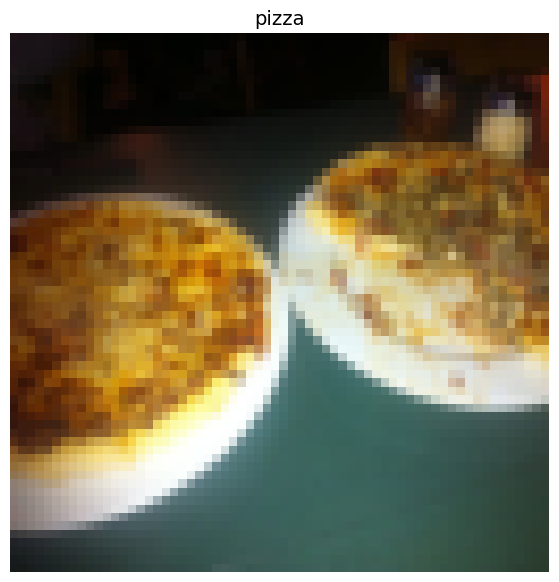

In [29]:
# let us visualize some data 
# but brfore that we need to rearrange our data to be acceptable by matplotlib
img_permute=img.permute(1,2,0)

# print out shapes
print(f'Original shape:{img.shape}')
print(f'New shape:{img_permute.shape}')

# plot thr image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label],fontsize=14)


## 4.1 Turn loaded images to `Dataloaders`

In [30]:
# turn our test and train datsets into image loaders
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            num_workers=os.cpu_count(),
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           num_workers=os.cpu_count(),
                           shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fb60ed89280>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb60ed89be0>)

In [31]:
len(train_dataloader),len(test_dataloader)

(8, 3)

In [33]:
img,label=next(iter(train_dataloader))

# batch size will ne now 1
print(f'Image Size:{img.shape}')
print(f'Label shape:{label.shape}')

Image Size:torch.Size([32, 3, 64, 64])
Label shape:torch.Size([32])


## 5 Option 2: Loading image if Imageloader was not available

1. load image from file
2. get class names from thr Dataset
3. get classes as dictionary

pros:
* can create a datset out of almost everything
* not limited to PyTorch pre-built `Dataset` functions

cons:
* even though you could create `Dataset` out of almost everything but it diesnot mean it is going to work
* using custom datset you might have to write a lot of code, which will be prone to errors

In [40]:
#n let us import all the libraries
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict,List

### 5.1 Creating a helper function to get the class names
1. Get the class names `os.scandir` to traverse a target directory
2. Raise error if thr class names are not found 
3. Turn the class names into dict

In [41]:
# set up path for target directory
target_directory=train_dir
print(f'Target dir:{target_directory}')

# get the class names from the target directory
class_names_found=sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir:data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [44]:
def find_classes(directory:str)->Tuple[List[str],Dict[str,int]]:
  """
  Finds the class folder names in thr target directory
  """
  #1. get the class names byy scanning the target directory
  classes=sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f'Could not find any classes in {directory}....please check file structure.')
  
  #3. Create a dictionary of index labels 
  class_to_idx={class_name:i for i,class_name in enumerate(classes)}
  return classes,class_to_idx


In [46]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom dataset to replicate `ImageFolder`

To create our own custom dataset we will
1. we will sublass `torch.utils.data.datset`
2. Init our subclass with a target directory as well as transform if we would like to use
3. Create several attributes
   * paths
   * Transform
   * Classes
   * Class_to_idx
4. Create a function to `load_images`
5. overwrite the `__len__` method to return the lenghth of our datset
5. overwrite `__getitem__` method to return a given sample when passed an index



In [53]:
# write a custom dataset
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  def __init__(self,
               target_dir:str,
               transform=None):
    # create class attributes
    self.paths=list(pathlib.Path(target_dir).glob('*/*.jpg'))
    # setup transforms
    self.transforms=transform
    # create classes and class to idx
    self.classes,self.class_to_idx=find_classes(target_dir)

  # Create a function to load images
  def load_images(self,index:int)->Image.Image:
    "opens an image via a path and returns it."
    image_path=self.paths[index]
    return Image.open(image_path)

  #overwrite __len__()
  def __len__(self)->int:
    "return the total number of samples"
    return len(self.paths)

  # overwrite the __getitem__
  def __getitem__(self,index:int)->Tuple[torch.Tensor,int]:
    img=self.load_image(index)
    class_name=self.paths[index].parent.name
    class_idx=self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img),class_idx
    else:
      return img,class_idx


In [54]:
# Create a transform
from torchvision import transforms
train_transforms=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [55]:
train_data_custom=ImageFolderCustom(target_dir=train_dir,
                                    transform=train_transforms)
test_data_custom=ImageFolderCustom(target_dir=test_dir,
                                   transform=test_transforms)


In [56]:
train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x7fb60efb59a0>,
 <__main__.ImageFolderCustom at 0x7fb60efb5490>)

In [58]:
len(train_data),len(train_data_custom),len(test_data),len(test_data_custom)

(225, 225, 75, 75)

In [59]:
train_data.classes,train_data_custom.classes

(['pizza', 'steak', 'sushi'], ['pizza', 'steak', 'sushi'])